# Titanic Dataset

## Libraries 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns
import os
import numpy as np
import math, time, random, datetime
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
print(os.getcwd())

C:\Users\NjordSoevik


## Begin Reading Data

In [2]:
train=pd.read_csv(r'C:\Users\NjordSoevik\Anaconda3\envs\data-science-projects\Projects\Titanic\data\train.csv')
test=pd.read_csv(r'C:\Users\NjordSoevik\Anaconda3\envs\data-science-projects\Projects\Titanic\data\test.csv')
gender_submission=pd.read_csv(r'C:\Users\NjordSoevik\Anaconda3\envs\data-science-projects\\Projects\Titanic\data\gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
len(train),len(test),len(gender_submission)

(891, 418, 418)

## Find MIssing Value Counts

In [8]:
def missing_vals(df):
    df_l=len(df)
    missing_vals={}
    for col in df.columns:
        total_col=df[col].value_counts().sum()
        missing_vals[col]=df_l-total_col
    return missing_vals

missing_vals(train)
#train.isnull().sum()

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [9]:
df_bin=pd.DataFrame()
df_con=pd.DataFrame()

## Variables

In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Survived

0    549
1    342
Name: Survived, dtype: int64


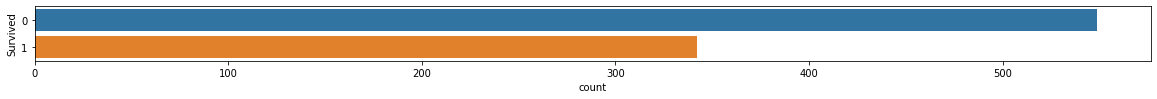

In [11]:
fig=plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [12]:
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

### Pclass 
#### Check if they are all valid 1-3 ints

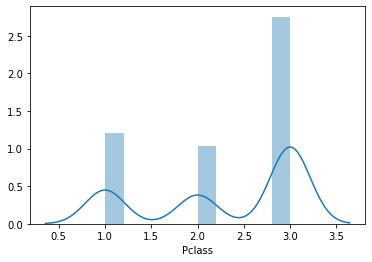

In [13]:
sns.distplot(train.Pclass)

In [14]:
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

#### Names

In [15]:
train.Name.value_counts()

Hosono, Mr. Masabumi                                1
Farthing, Mr. John                                  1
Ali, Mr. Ahmed                                      1
Garfirth, Mr. John                                  1
Lang, Mr. Fang                                      1
                                                   ..
Cacic, Mr. Luka                                     1
Plotcharsky, Mr. Vasil                              1
Stahelin-Maeglin, Dr. Max                           1
Warren, Mrs. Frank Manley (Anna Sophia Atkinson)    1
Watson, Mr. Ennis Hastings                          1
Name: Name, Length: 891, dtype: int64

#### Sex

0    549
1    342
Name: Survived, dtype: int64


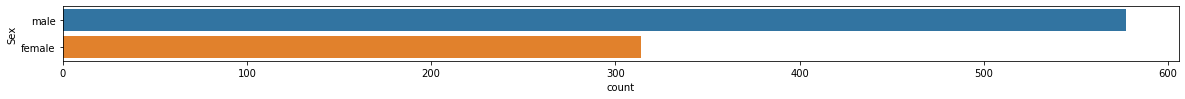

In [16]:
fig=plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=train);
print(train.Survived.value_counts())

In [17]:
# Change to binary
df_bin['Sex']=train['Sex']
df_con['Sex']=train['Sex']
df_bin['Sex']=np.where(df_bin['Sex']=='female',1,0)

In [18]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


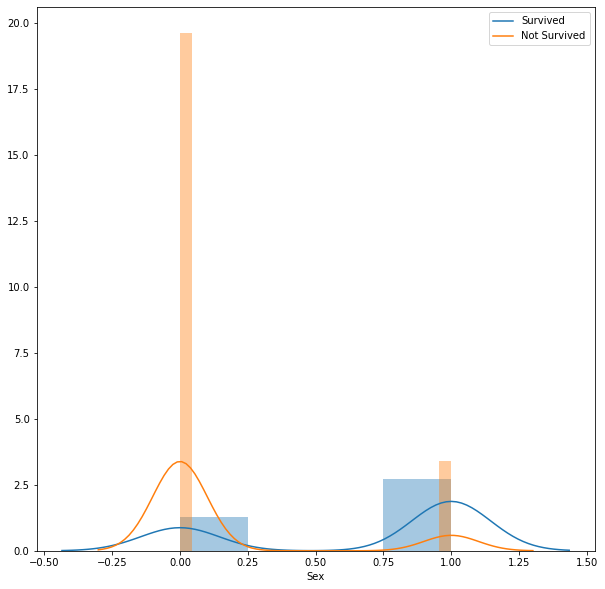

In [19]:
# Sex vs survival
fig=plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'],kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'],kde_kws={'label':'Not Survived'});


#### Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

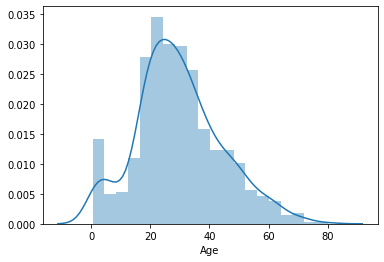

In [20]:
sns.distplot(train['Age'])
train['Age'].describe()

Create age exists column as a flag if the data exists

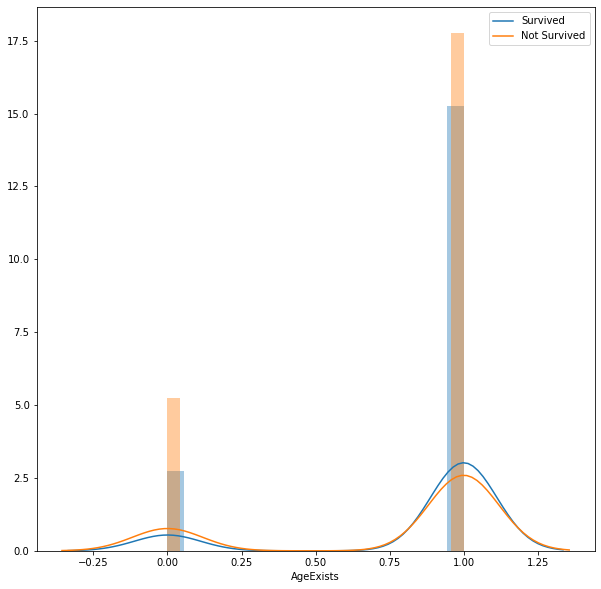

In [21]:
train['AgeExists']=train['Age'].apply(lambda x: 1 if x>0 else 0)
train['Age'].replace(np.NaN, train['Age'].mean(),inplace=True)
df_con['Age'],df_con['AgeExists']=train['Age'],train['AgeExists']
df_bin['Age'],df_bin['AgeExists']=pd.cut(train['Age'],bins=8),train['AgeExists']


fig=plt.figure(figsize=(10,10))
sns.distplot(df_con.loc[df_con['Survived']==1]['AgeExists'],kde_kws={'label':'Survived'});
sns.distplot(df_con.loc[df_con['Survived']==0]['AgeExists'],kde_kws={'label':'Not Survived'});

See no clear relation to age existing and survival

#### SibSp

In [22]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

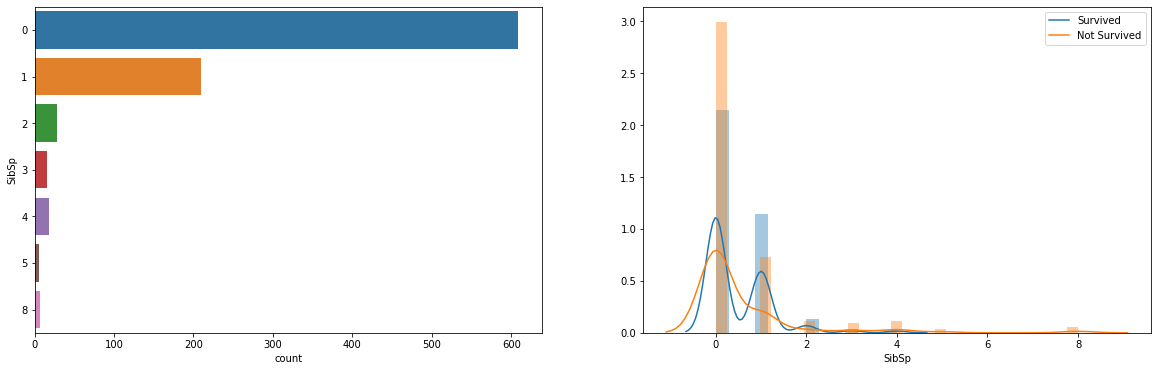

In [24]:
fig=plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(y='SibSp', data=train);
plt.subplot(1,2,2)
sns.distplot(df_bin.loc[df_bin['Survived']==1]['SibSp'],kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['SibSp'],kde_kws={'label':'Not Survived'});

#### Parch

In [25]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

Ticket number (ignore for now)

#### Fare

In [26]:
print(len(train.Fare.unique()))

248


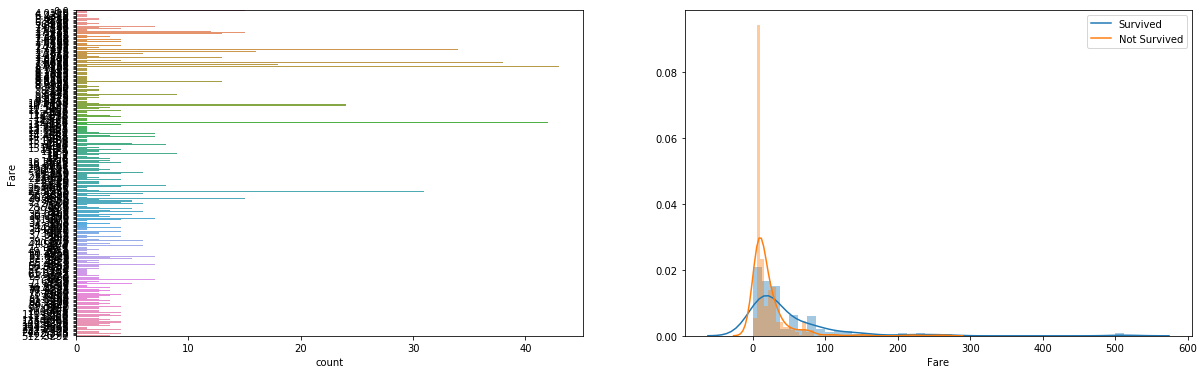

In [27]:
fig=plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(y='Fare', data=train);
plt.subplot(1,2,2)
sns.distplot(train.loc[train['Survived']==1]['Fare'],kde_kws={'label':'Survived'});
sns.distplot(train.loc[train['Survived']==0]['Fare'],kde_kws={'label':'Not Survived'});

In [28]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 

def replaceFare(x):
    if x<8:
        return 0
    elif 8<=x<14:
        return 1
    elif 14<=x<40:
        return 3
    else:
        return 4
    
df_bin['Fare']= train['Fare'].apply(replaceFare)


df_bin.Fare.value_counts()

3    279
0    241
1    195
4    176
Name: Fare, dtype: int64

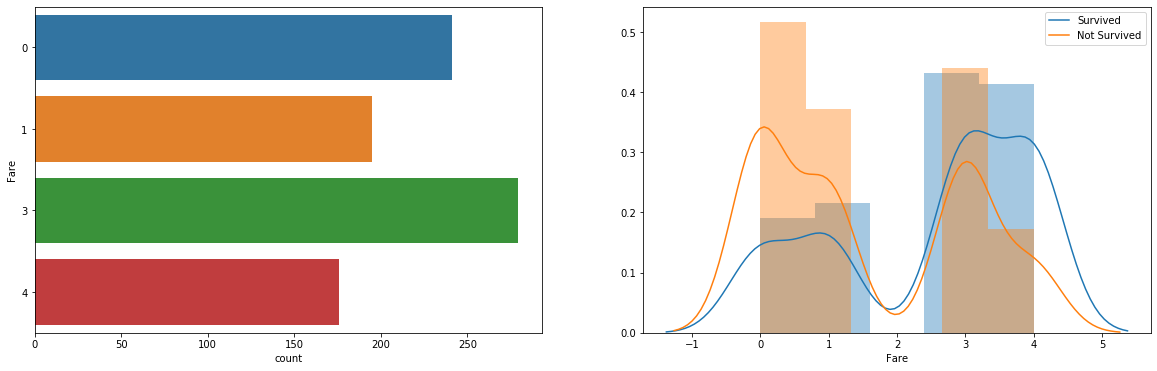

In [29]:
fig=plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(y='Fare', data=df_bin);
plt.subplot(1,2,2)
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Fare'],kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Fare'],kde_kws={'label':'Not Survived'});

#### Cabin

In [30]:
train.Cabin.isnull().sum()

687

Almost all empty, do not take this data

#### Embarked

In [31]:
train.Embarked.isnull().sum()

2

Drop these two rows

In [32]:
df_con['Embarked']=train['Embarked']
df_bin['Embarked']=train['Embarked']
print(len(df_bin))
df_con=df_con.dropna(subset=['Embarked'])
df_bin=df_bin.dropna(subset=['Embarked'])
print(len(df_bin))

891
889


## Encoding
* One hot encoding - takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns ( 1s and 0s ), depending on which column has what value.

In [33]:
df_bin.head()

,Survived,Pclass,Sex,Age,AgeExists,SibSp,Parch,Fare,Embarked
0,0,3,0,"(20.315, 30.263]",1,1,0,0,S
1,1,1,1,"(30.263, 40.21]",1,1,0,4,C
2,1,3,1,"(20.315, 30.263]",1,0,0,0,S
3,1,1,1,"(30.263, 40.21]",1,1,0,4,S
4,0,3,0,"(30.263, 40.21]",1,0,0,1,S


In [34]:
one_hot_cols=df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc=pd.get_dummies(df_bin,columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,"Age_(0.34, 10.368]","Age_(10.368, 20.315]","Age_(20.315, 30.263]","Age_(30.263, 40.21]",...,Parch_4,Parch_5,Parch_6,Fare_0,Fare_1,Fare_3,Fare_4,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [35]:
df_con.head()

,Survived,Pclass,Sex,Age,AgeExists,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,1,0,7.2500,S
1,1,1,female,38.0,1,1,0,71.2833,C
2,1,3,female,26.0,1,0,0,7.9250,S
3,1,1,female,35.0,1,1,0,53.1000,S
4,0,3,male,35.0,1,0,0,8.0500,S


### One hot encode the categorical columns

In [36]:
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [37]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
df_con_enc.head()

,Survived,Age,AgeExists,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,1,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,1,0,0,8.0500,0,0,1,0,1,0,0,1


In [38]:
X_train=df_con_enc.drop('Survived',axis=1)
y_train=df_con_enc['Survived']
X_train.head()


,Age,AgeExists,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,1,0,0,8.0500,0,0,1,0,1,0,0,1


In [39]:
y_train.shape

(889,)

## Modeling

### Create Models

In [40]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [41]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

C:\Users\NjordSoevik\Anaconda3\envs\data-science-projects\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 79.75
Accuracy CV 10-Fold: 79.64
Running Time: 0:00:02.133000


In [42]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 81.89
Accuracy CV 10-Fold: 70.42
Running Time: 0:00:00.112020


In [43]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.29
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.039002


In [44]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.74
Accuracy CV 10-Fold: 69.4
Running Time: 0:00:00.196998


C:\Users\NjordSoevik\Anaconda3\envs\data-science-projects\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [45]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 75.48
Accuracy CV 10-Fold: 70.42
Running Time: 0:00:00.055001


In [46]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 98.2
Accuracy CV 10-Fold: 78.18
Running Time: 0:00:00.065995


In [47]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.54
Accuracy CV 10-Fold: 82.79
Running Time: 0:00:00.442997


### Evaluate

In [48]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,98.20
6,Gradient Boosting Trees,89.54
0,KNN,81.89
1,Logistic Regression,79.75
4,Linear SVC,78.74
2,Naive Bayes,78.29
3,Stochastic Gradient Decent,75.48


In [49]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,82.79
1,Logistic Regression,79.64
5,Decision Tree,78.18
2,Naive Bayes,77.95
0,KNN,70.42
3,Stochastic Gradient Decent,70.42
4,Linear SVC,69.40


In [50]:
# Decision Tree Classifier
# Function that runs the requested algorithm and returns the accuracy metrics

GradBoost_model = GradientBoostingClassifier().fit(X_train, y_train)
acc = round(GradBoost_model.score(X_train, y_train) * 100, 2)

# Cross Validation 
train_pred = model_selection.cross_val_predict(GradientBoostingClassifier(), 
                                              X_train, 
                                              y_train, 
                                              cv=10, 
                                              n_jobs = -1)

### Feature importance

,imp,col
1,0.000292,AgeExists
11,0.000920,pclass_2
3,0.001303,Parch
6,0.002396,embarked_Q
5,0.003423,embarked_C
7,0.015935,embarked_S
10,0.029528,pclass_1
2,0.057430,SibSp
12,0.120776,pclass_3
0,0.123293,Age


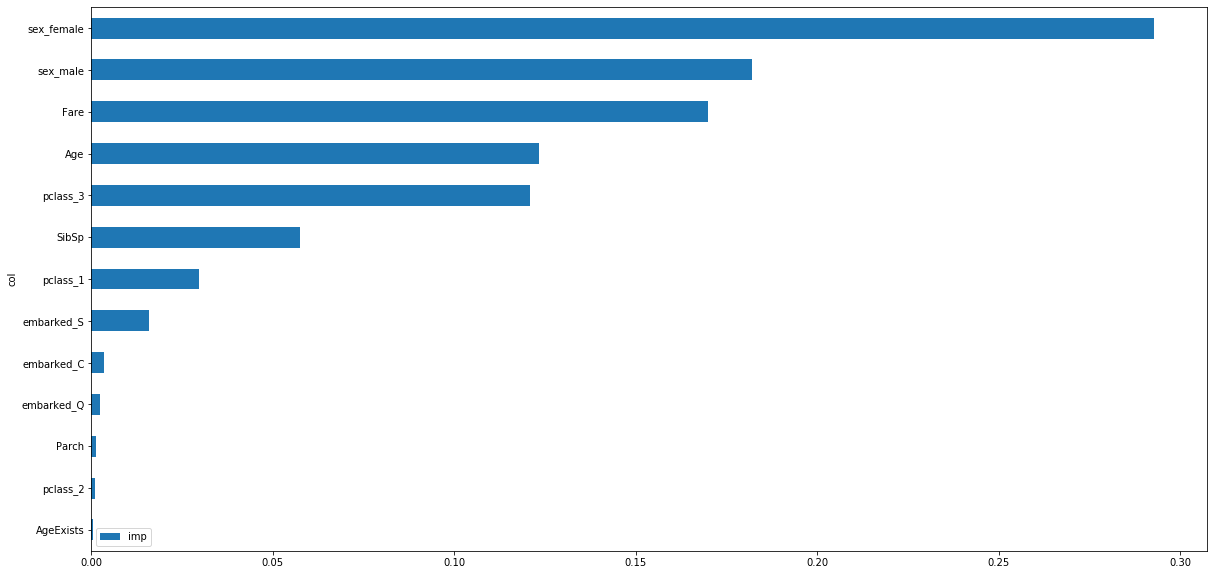

In [51]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

    
# Plot the feature importance scores
feature_importance(GradBoost_model, X_train)

### Precision and Recall
#### Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

Recall - measures a models ability to find all the relevant cases in a dataset.
Recall would be the models ability to find the 1 person in 100,000 who has the disease.

Precision - measures a models ability to correctly identify only relevant instances.

Combining the precision and recall, gives an F1 score.

## Submit

In [52]:
X_train.head()

,Age,AgeExists,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,1,0,0,8.0500,0,0,1,0,1,0,0,1


In [53]:
test['AgeExists']=test['Age'].apply(lambda x: 1 if x>0 else 0)
test['Age'].replace(np.NaN, train['Age'].mean(),inplace=True)
test['Fare']=test['Fare'].fillna(train['Fare'].mean())
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeExists        0
dtype: int64

In [54]:
# One hot encode the columns in the test data frame
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeExists,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,1,1,0,0,0,1


In [56]:
wanted_test_columns = X_train.columns
print(wanted_test_columns)
testing_df=test[wanted_test_columns]
testing_df.head()

Index(['Age', 'AgeExists', 'SibSp', 'Parch', 'Fare', 'embarked_C',
       'embarked_Q', 'embarked_S', 'sex_female', 'sex_male', 'pclass_1',
       'pclass_2', 'pclass_3'],
      dtype='object')


,Age,AgeExists,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,34.5,1,0,0,7.8292,0,1,0,0,1,0,0,1
1,47.0,1,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,1,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,1,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,1,12.2875,0,0,1,1,0,0,0,1


In [57]:
predictions = GradBoost_model.predict(testing_df)

In [58]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [59]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [60]:
submission.dtypes
submission['Survived'] = submission['Survived'].astype(int)
submission.dtypes

PassengerId    int64
Survived       int32
dtype: object

In [61]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched.")

Submission dataframe is the same length as test (418 rows).


In [62]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('gradboosting_submission.csv', index=False)
print('Submission CSV')

Submission CSV
